In [5]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
import numpy as np

In [18]:
import os
directory_list = os.listdir()
print("Files and directories in  current working directory :") 
print(directory_list)

Files and directories in  current working directory :
['.ipynb_checkpoints', 'Analize_abs_data_GOM21FA.ipynb', 'BC_11', 'BC_12', 'BC_13', 'BC_14', 'BC_15', 'BC_16', 'BC_5B', 'BC_7', 'BC_9', 'BC_MK', 'BC_STD', 'GOM21FA_BC_2_2153_Absorption_spectra.csv', 'model_fit.png', 'PW_11', 'PW_12', 'PW_13', 'PW_14', 'PW_15', 'PW_16', 'PW_2', 'PW_4', 'PW_5B', 'PW_7', 'PW_9', 'PW_MK', 'PW_STD', 'WC_11', 'WC_12', 'WC_13', 'WC_14', 'WC_14.5', 'WC_15', 'WC_16', 'WC_16.2', 'WC_2', 'WC_4', 'WC_5B', 'WC_6', 'WC_7', 'WC_9', 'WC_MK', 'WC_MK2', 'WC_STD']


In [35]:
files = glob.glob('BC_15/*.txt')
files

['BC_15\\215341_Absorbance__0__83.txt',
 'BC_15\\215341_Absorbance__1__84.txt',
 'BC_15\\215341_Absorbance__2__85.txt',
 'BC_15\\215343_Absorbance__0__86.txt',
 'BC_15\\215343_Absorbance__1__87.txt',
 'BC_15\\215343_Absorbance__2__88.txt',
 'BC_15\\215345_Absorbance__0__89.txt',
 'BC_15\\215345_Absorbance__1__90.txt',
 'BC_15\\215345_Absorbance__2__91.txt',
 'BC_15\\215347_Absorbance__0__92.txt',
 'BC_15\\215347_Absorbance__1__93.txt',
 'BC_15\\215347_Absorbance__2__94.txt',
 'BC_15\\215349_Absorbance__0__95.txt',
 'BC_15\\215349_Absorbance__1__96.txt',
 'BC_15\\215351_Absorbance__0__96.txt',
 'BC_15\\215351_Absorbance__1__97.txt',
 'BC_15\\215351_Absorbance__2__98.txt',
 'BC_15\\215353_Absorbance__0__99.txt',
 'BC_15\\215353_Absorbance__1__100.txt',
 'BC_15\\215353_Absorbance__2__101.txt',
 'BC_15\\215355_Absorbance__0__102.txt',
 'BC_15\\215355_Absorbance__1__103.txt',
 'BC_15\\215355_Absorbance__2__104.txt',
 'BC_15\\215357_Absorbance__0__105.txt',
 'BC_15\\215357_Absorbance__1__106

In [20]:
#THIS SHOWS WHAT THE DIFFERENT "CORRECTIONS DO TO THE ORIGINAL ABS"
df = pd.read_csv(files[1], skiprows=1f4, names=['wl', 'abs'], sep='\t')
df['abs_adj'] = df['abs']*(2.303/.488) #the denominator is spacific the the waveguide
bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs_adj'].mean()
df['abs_corr'] = df['abs_adj']-bcorr

fig, ax = plt.subplots(figsize=(10,5))
df.plot(x='wl', y='abs', ax=ax)
df.plot(x='wl', y='abs_adj', ax=ax)
df.plot(x='wl', y='abs_corr', ax=ax, ls=':')
print(bcorr)

SyntaxError: invalid syntax (<ipython-input-20-3962a301cba0>, line 2)

KeyError: 'abs_corr'

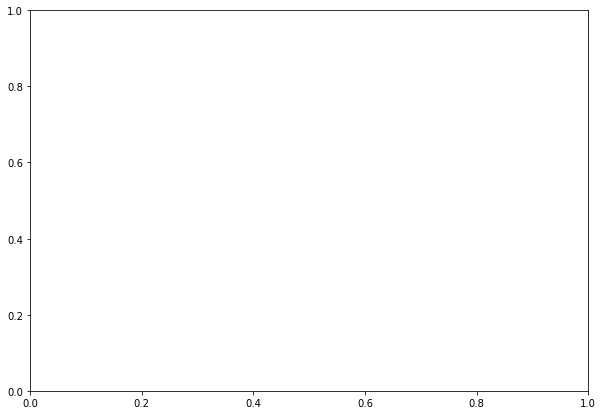

In [21]:
#THIS SHOWS ONE CORRECTED ABS SPECTRA 
# this pulles from the selcted files[X] 
fig, ax = plt.subplots(figsize=(10,7))
df.plot(x='wl', y='abs_corr', ax=ax, c='g')
ax.set_xlim(250,600) #edits x limet 
ax.set_ylim(-.25,6) #edits y limet 

In [22]:
# THIS MAKES A DATA FRAME OF ONLY THE ABSORPTION FOR files[0]
df = pd.read_csv(files[0], skiprows=14, names=['wl', 'abs'], sep='\t')
def open_file(name):
    # returns a datafame from a raw file
    # input: filename (string)
    # output: pandas dataframe 
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )

    # unit conversion 
    df['abs'] = df['abs']*(2.303/.488)
    # baseline correction
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float
    df['abs'] = df['abs'] - bcorr
    return df
df

,wl,abs
0,189.2794,-0.0143
1,189.6618,-0.0143
2,190.0441,-0.0143
3,190.4264,-0.0094
4,190.8087,0.0040
...,...,...
2043,880.5978,0.0061
2044,880.8884,-0.0109
2045,881.1790,-0.0111
2046,881.4695,-0.0111


(275.0, 600.0)

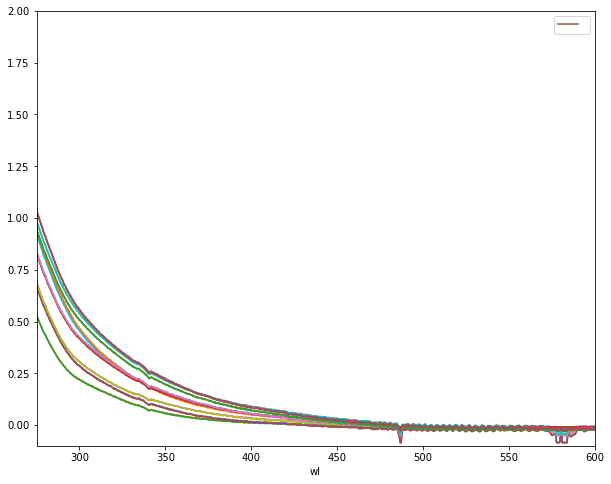

In [36]:
# THIS IS A GRAPH OF ALL THE FILES ABSORPANCE
#Creates a figure, with size 10X8
fig, ax = plt.subplots(figsize=(10,8))
#creates an empty list
frames = []
#loops through the list of names
for f in files:
    #opens file with above function
    df = open_file(f)
    
    #plots with names in the dataframe df.plot(xname, yname)
    #label='', cleans the label, otherwishe there will be all called 'abs'
    #ax=ax, tell it to put the plot in the box called ax defined above in fig, ax =
    df.plot('wl', 'abs', label='', ax=ax) #f[28:34]
    # updates the list created above with the new dataframe
    frames.append(df)
#frames is a list of dataframes

#concatenates all dataframes in one single dataframe
full = pd.concat(frames, axis=0, ignore_index=True)

#this sets the limet of the graphs
ax.set_ylim(-.1,2)
ax.set_xlim(275,600)


In [8]:
# DEFINES A FUNTION WHERE THE ID IS THW WAVELTHS
# AND THE ABSORBANCE IS CONVERTED TO ABSORPTION 

def open_file(name):
    # returns a datafame from a raw file
    # input: filename (string)
    # output: pandas dataframe 

    df = pd.read_csv(name, skiprows=14, sep='\t', names=['abs'], index_col=0)
    
    # unit conversion (?)
    df['abs'] = df['abs']*(2.303/.488)
    # baseline correction
    bcorr = df[(df.index>=700) & (df.index<=750)]['abs'].mean() # a float
    df['abs'] = df['abs'] - bcorr
    return df

(260.0, 700.0)

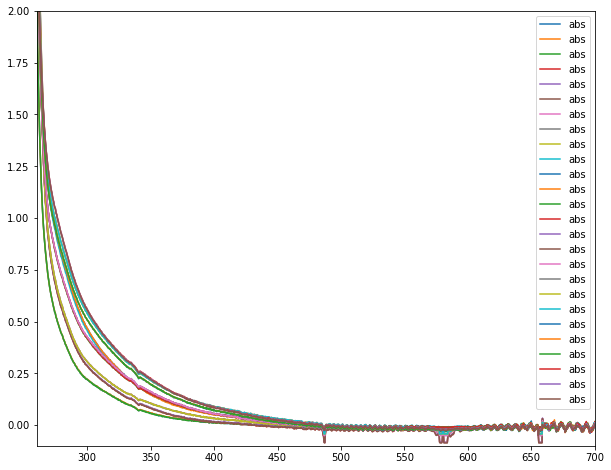

In [9]:
# THIS IS A GRAPH OF ALL THE FILES ABSORPTION 
#Creates a figure, with size 10X8
fig, ax = plt.subplots(figsize=(10,8))

#creates an empty list
frames = []

#loops through the list of names
for f in files:
    #opens file with above function
    df = open_file(f)
    ID = f.split("\\")[-1][17:-4]
    df.rename({'abs': ID})
    #plots with names in the dataframe df.plot(xname, yname)
    #label='', cleans the label, otherwishe there will be all called 'abs'
    #ax=ax, tell it to put the plot in the box called ax defined above in fig, ax =
    df.plot(label='', ax=ax)
    # updates the list created above with the new dataframe
    frames.append(df)
#frames is a list of dataframes

#this sets the limet of the graphs
ax.set_ylim(-.1,2)
ax.set_xlim(260,700)

In [10]:
# concatenates all dataframes in one single dataframe
df = pd.concat(frames, axis=1, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
189.2794,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,-0.044200,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
189.6618,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,-0.044200,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
190.0441,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,-0.044200,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
190.4264,-0.075401,-0.052067,-0.043426,-0.103101,-0.123591,-0.105138,-0.088716,-0.027871,-0.020132,-0.036649,...,-0.129756,-0.087157,-0.121154,-0.095383,-0.094526,-0.115470,-0.130652,-0.135482,-0.113283,-0.092091
190.8087,-0.012163,-0.014313,-0.016998,-0.070066,-0.077342,-0.082014,0.005669,0.013659,0.006296,-0.009277,...,-0.023100,-0.048459,-0.064994,-0.068011,-0.066682,-0.047512,-0.032491,-0.022691,-0.035415,-0.045371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,-0.002252,-0.071416,-0.028796,-0.066291,-0.093388,-0.083901,0.002838,-0.042972,-0.022491,-0.039481,...,-0.093417,-0.066392,-0.108884,-0.074146,-0.092638,-0.090458,-0.116494,-0.069412,-0.123194,-0.097283
880.8884,-0.082480,-0.118137,-0.103833,-0.185216,-0.210897,-0.187725,-0.087772,-0.102435,-0.089977,-0.133394,...,-0.167510,-0.128215,-0.158908,-0.090664,-0.180888,-0.084322,-0.169350,-0.177011,-0.129329,-0.153442
881.1790,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,-0.053638,...,-0.135891,-0.115945,-0.123041,-0.101046,-0.100661,-0.126324,-0.126405,-0.114245,-0.088743,-0.118047
881.4695,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,-0.053638,...,-0.135891,-0.115945,-0.123041,-0.101046,-0.100661,-0.126324,-0.126405,-0.114245,-0.088743,-0.118047


In [11]:
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'wl'})
df

,wl,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,189.2794,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
1,189.6618,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
2,190.0441,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.128340,-0.114529,-0.129176,-0.101046,-0.109155,-0.090458,-0.140562,-0.095368,-0.118002,-0.098698
3,190.4264,-0.075401,-0.052067,-0.043426,-0.103101,-0.123591,-0.105138,-0.088716,-0.027871,-0.020132,...,-0.129756,-0.087157,-0.121154,-0.095383,-0.094526,-0.115470,-0.130652,-0.135482,-0.113283,-0.092091
4,190.8087,-0.012163,-0.014313,-0.016998,-0.070066,-0.077342,-0.082014,0.005669,0.013659,0.006296,...,-0.023100,-0.048459,-0.064994,-0.068011,-0.066682,-0.047512,-0.032491,-0.022691,-0.035415,-0.045371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,880.5978,-0.002252,-0.071416,-0.028796,-0.066291,-0.093388,-0.083901,0.002838,-0.042972,-0.022491,...,-0.093417,-0.066392,-0.108884,-0.074146,-0.092638,-0.090458,-0.116494,-0.069412,-0.123194,-0.097283
2044,880.8884,-0.082480,-0.118137,-0.103833,-0.185216,-0.210897,-0.187725,-0.087772,-0.102435,-0.089977,...,-0.167510,-0.128215,-0.158908,-0.090664,-0.180888,-0.084322,-0.169350,-0.177011,-0.129329,-0.153442
2045,881.1790,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,...,-0.135891,-0.115945,-0.123041,-0.101046,-0.100661,-0.126324,-0.126405,-0.114245,-0.088743,-0.118047
2046,881.4695,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,...,-0.135891,-0.115945,-0.123041,-0.101046,-0.100661,-0.126324,-0.126405,-0.114245,-0.088743,-0.118047


In [12]:
# list the files again so you have a list to refer to
files = glob.glob('BC_2/*.txt')
files

['BC_2\\215341_Absorbance__0__83.txt',
 'BC_2\\215341_Absorbance__1__84.txt',
 'BC_2\\215341_Absorbance__2__85.txt',
 'BC_2\\215343_Absorbance__0__86.txt',
 'BC_2\\215343_Absorbance__1__87.txt',
 'BC_2\\215343_Absorbance__2__88.txt',
 'BC_2\\215345_Absorbance__0__89.txt',
 'BC_2\\215345_Absorbance__1__90.txt',
 'BC_2\\215345_Absorbance__2__91.txt',
 'BC_2\\215347_Absorbance__0__92.txt',
 'BC_2\\215347_Absorbance__1__93.txt',
 'BC_2\\215347_Absorbance__2__94.txt',
 'BC_2\\215349_Absorbance__0__95.txt',
 'BC_2\\215349_Absorbance__1__96.txt',
 'BC_2\\215351_Absorbance__0__96.txt',
 'BC_2\\215351_Absorbance__1__97.txt',
 'BC_2\\215351_Absorbance__2__98.txt',
 'BC_2\\215353_Absorbance__0__99.txt',
 'BC_2\\215353_Absorbance__1__100.txt',
 'BC_2\\215353_Absorbance__2__101.txt',
 'BC_2\\215355_Absorbance__0__102.txt',
 'BC_2\\215355_Absorbance__1__103.txt',
 'BC_2\\215355_Absorbance__2__104.txt',
 'BC_2\\215357_Absorbance__0__105.txt',
 'BC_2\\215357_Absorbance__1__106.txt',
 'BC_2\\215357_Abs

(-0.25, 6.0)

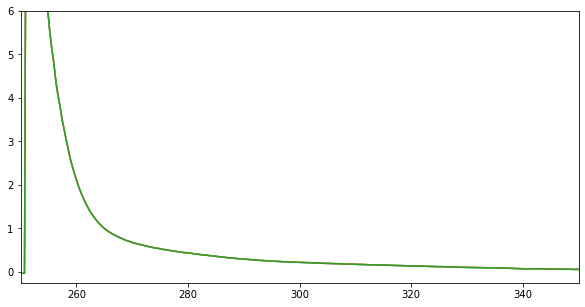

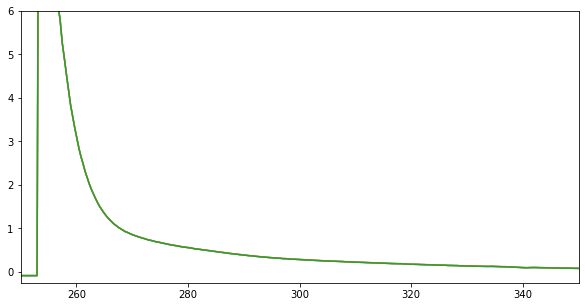

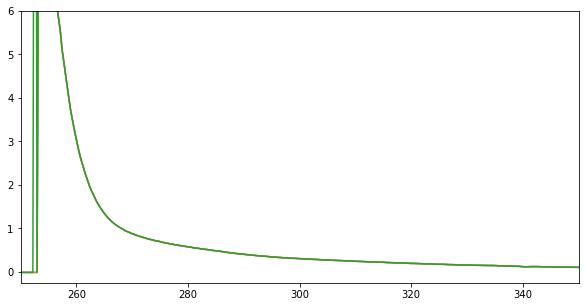

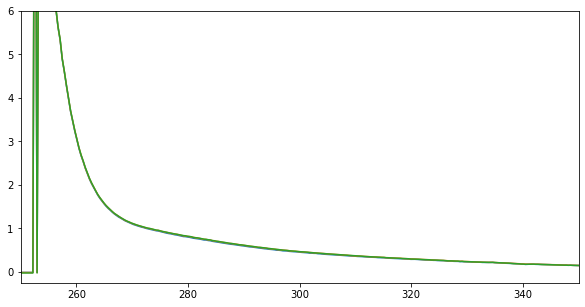

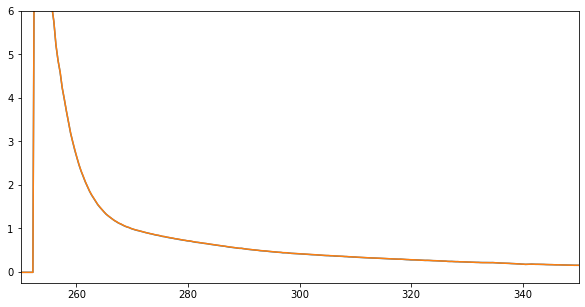

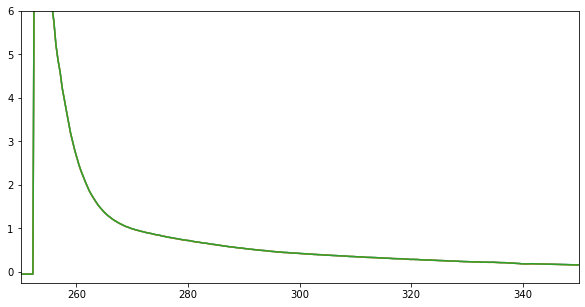

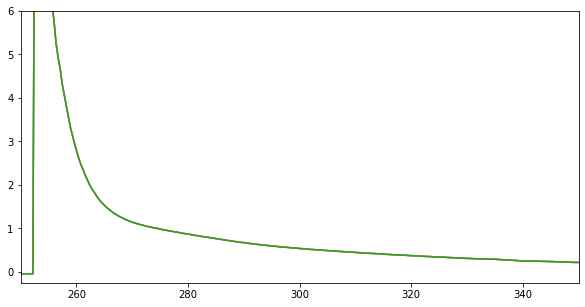

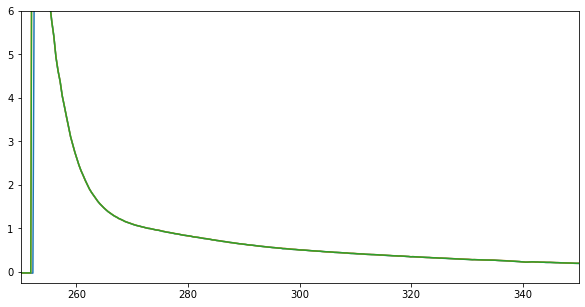

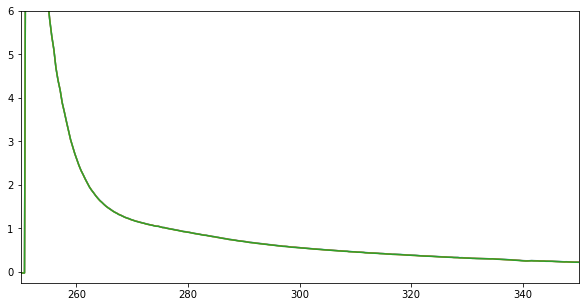

In [13]:
#THIS PLOT PLOTS THE DUPLICATES 
# thhere should be three dups for each data point 
# so if the grop shows only one line it is good 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[0])
ax.plot(df['wl'], df[1])
ax.plot(df['wl'], df[2])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[3])
ax.plot(df['wl'], df[4])
ax.plot(df['wl'], df[5])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[6])
ax.plot(df['wl'], df[7])
ax.plot(df['wl'], df[8])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[9])
ax.plot(df['wl'], df[10])
ax.plot(df['wl'], df[11])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[12])
ax.plot(df['wl'], df[13])
#ax.plot(df['wl'], df[X])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[14])
ax.plot(df['wl'], df[15])
ax.plot(df['wl'], df[16])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[17])
ax.plot(df['wl'], df[18])
ax.plot(df['wl'], df[19])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[20])
ax.plot(df['wl'], df[21])
ax.plot(df['wl'], df[22])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['wl'], df[23])
ax.plot(df['wl'], df[24])
ax.plot(df['wl'], df[25])
ax.set_xlim(250,350)
ax.set_ylim(-.25,6)

# add more plots coresponign to the number of samples in the set 

In [14]:
# list the files again so you have a list to refer to
files = glob.glob('BC_2/*.txt')
files

['BC_2\\215341_Absorbance__0__83.txt',
 'BC_2\\215341_Absorbance__1__84.txt',
 'BC_2\\215341_Absorbance__2__85.txt',
 'BC_2\\215343_Absorbance__0__86.txt',
 'BC_2\\215343_Absorbance__1__87.txt',
 'BC_2\\215343_Absorbance__2__88.txt',
 'BC_2\\215345_Absorbance__0__89.txt',
 'BC_2\\215345_Absorbance__1__90.txt',
 'BC_2\\215345_Absorbance__2__91.txt',
 'BC_2\\215347_Absorbance__0__92.txt',
 'BC_2\\215347_Absorbance__1__93.txt',
 'BC_2\\215347_Absorbance__2__94.txt',
 'BC_2\\215349_Absorbance__0__95.txt',
 'BC_2\\215349_Absorbance__1__96.txt',
 'BC_2\\215351_Absorbance__0__96.txt',
 'BC_2\\215351_Absorbance__1__97.txt',
 'BC_2\\215351_Absorbance__2__98.txt',
 'BC_2\\215353_Absorbance__0__99.txt',
 'BC_2\\215353_Absorbance__1__100.txt',
 'BC_2\\215353_Absorbance__2__101.txt',
 'BC_2\\215355_Absorbance__0__102.txt',
 'BC_2\\215355_Absorbance__1__103.txt',
 'BC_2\\215355_Absorbance__2__104.txt',
 'BC_2\\215357_Absorbance__0__105.txt',
 'BC_2\\215357_Absorbance__1__106.txt',
 'BC_2\\215357_Abs

In [15]:
# MAKE A NEW DATA FRAME FROM THE AVG OF EACH SCAN 
# manually rename them with the appropate format 
# edit this to match the pots made above so you dont make 
# bad averages 
df['215341'] = df.loc[:,(0,1,2)].mean(axis=1)
df['215343'] = df.loc[:,(3,4,5)].mean(axis=1)
df['215345'] = df.loc[:,(6,7,8)].mean(axis=1)
df['215347'] = df.loc[:,(9,10,11)].mean(axis=1)
df['215349'] = df.loc[:,(12,13)].mean(axis=1)
df['215351'] = df.loc[:,(14,15,16)].mean(axis=1)
df['215353'] = df.loc[:,(17,18,19)].mean(axis=1)
df['215355'] = df.loc[:,(20,21,22)].mean(axis=1)
df['215357'] = df.loc[:,(23,24,25)].mean(axis=1)

df

,wl,0,1,2,3,4,5,6,7,8,...,25,215341,215343,215345,215347,215349,215351,215353,215355,215357
0,189.2794,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.098698,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
1,189.6618,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.098698,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
2,190.0441,-0.098525,-0.081799,-0.052393,-0.136136,-0.129726,-0.137229,-0.025006,-0.053826,-0.033817,...,-0.098698,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
3,190.4264,-0.075401,-0.052067,-0.043426,-0.103101,-0.123591,-0.105138,-0.088716,-0.027871,-0.020132,...,-0.092091,-0.056965,-0.110610,-0.045573,-0.071649,-0.031241,-0.109972,-0.101231,-0.113549,-0.113619
4,190.8087,-0.012163,-0.014313,-0.016998,-0.070066,-0.077342,-0.082014,0.005669,0.013659,0.006296,...,-0.045371,-0.014491,-0.076474,0.008541,-0.013760,-0.001746,-0.026284,-0.060488,-0.048895,-0.034492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,880.5978,-0.002252,-0.071416,-0.028796,-0.066291,-0.093388,-0.083901,0.002838,-0.042972,-0.022491,...,-0.097283,-0.034155,-0.081193,-0.020875,-0.054188,-0.079142,-0.081184,-0.083141,-0.099863,-0.096629
2044,880.8884,-0.082480,-0.118137,-0.103833,-0.185216,-0.210897,-0.187725,-0.087772,-0.102435,-0.089977,...,-0.153442,-0.101483,-0.194613,-0.093395,-0.113651,-0.106749,-0.147726,-0.125929,-0.144853,-0.153261
2045,881.1790,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,...,-0.118047,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012
2046,881.4695,-0.083423,-0.065753,-0.071742,-0.145574,-0.155210,-0.143364,-0.040108,-0.072232,-0.056942,...,-0.118047,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012


In [16]:
# REMOVES THE DATA THAT IS NOT AVERAGES 
# in df.iloc[:, X:Y],
# X must be 1 to save the wl 
# Y is the number of files + 2
df.drop(df.iloc[:, 1:27], inplace = True, axis = 1)
df

,wl,215341,215343,215345,215347,215349,215351,215353,215355,215357
0,189.2794,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
1,189.6618,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
2,190.0441,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
3,190.4264,-0.056965,-0.110610,-0.045573,-0.071649,-0.031241,-0.109972,-0.101231,-0.113549,-0.113619
4,190.8087,-0.014491,-0.076474,0.008541,-0.013760,-0.001746,-0.026284,-0.060488,-0.048895,-0.034492
...,...,...,...,...,...,...,...,...,...,...
2043,880.5978,-0.034155,-0.081193,-0.020875,-0.054188,-0.079142,-0.081184,-0.083141,-0.099863,-0.096629
2044,880.8884,-0.101483,-0.194613,-0.093395,-0.113651,-0.106749,-0.147726,-0.125929,-0.144853,-0.153261
2045,881.1790,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012
2046,881.4695,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012


In [17]:
Absorption_spectra = df
Absorption_spectra
# save as a CSV 
# name it someththing that makes sence 
#Absorption_spectra.to_csv('GOM21FA_ID2103_BC_2_Absorption_spectra.csv')

,wl,215341,215343,215345,215347,215349,215351,215353,215355,215357
0,189.2794,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
1,189.6618,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
2,190.0441,-0.077572,-0.134364,-0.037550,-0.059379,-0.071119,-0.098016,-0.114917,-0.113392,-0.104023
3,190.4264,-0.056965,-0.110610,-0.045573,-0.071649,-0.031241,-0.109972,-0.101231,-0.113549,-0.113619
4,190.8087,-0.014491,-0.076474,0.008541,-0.013760,-0.001746,-0.026284,-0.060488,-0.048895,-0.034492
...,...,...,...,...,...,...,...,...,...,...
2043,880.5978,-0.034155,-0.081193,-0.020875,-0.054188,-0.079142,-0.081184,-0.083141,-0.099863,-0.096629
2044,880.8884,-0.101483,-0.194613,-0.093395,-0.113651,-0.106749,-0.147726,-0.125929,-0.144853,-0.153261
2045,881.1790,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012
2046,881.4695,-0.073639,-0.148049,-0.056427,-0.055918,-0.053894,-0.110601,-0.113344,-0.117796,-0.107012


In [ ]:
#HYPERBLIC EQUASION FOR ONE DATA POINT 

In [54]:
def hyperbolic_equation(x, qi, exp, di):
        return qi*(1+exp*di*x)**(-1/exp)

In [55]:
#get the data and fit
x = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
y = df[(df['wl']>=275) & (df['wl']<=700)]['215341']
parameters, cv = scipy.optimize.curve_fit(hyperbolic_equation, x ,y, maxfev=5000)
[qi, b, di] = parameters

In [56]:
# determine quality of the fit
yfit = hyperbolic_equation(x, qi, b, di)
squaredDiffs = np.square(y - yfit)
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

R² = 0.9512641771923408


Y = 21.434684507219423 / ((1.0+-0.12429829779737019*0.011494926453063813*x)^(-1/-0.12429829779737019))


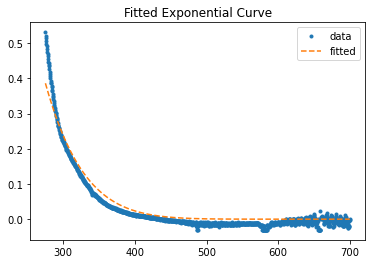

In [57]:
# plot the results
plt.plot(x, y, '.', label="data")
plt.plot(x, yfit, '--', label="fitted")
plt.title("Fitted Exponential Curve")
plt.legend()
print(f"Y = {qi} / ((1.0+{b}*{di}*x)^(-1/{b}))")

In [39]:
# for the next part we need to make the outputs tabel 
# we need abs 350, abd 412, abs 444, 
# we need SS 275 - 295, SS 350 - 400, SS 275 - 700,
# we need the Sr defined as (SS 275 - 295/SS 350 - 400) 

#Hyperbolic (HM) y = A((wl)/(532)) ^-sh
#hyperbolic model of the form: ag(k)~k^-sh

# MY GOAL IS TO CALCUATE IT WITH HYPERBOIC MODLE AND GAUSSIAN MODLE 
# THEN MAKE IT INTO A TABEL WITH ALL SATATS FOR ALL LINES

In [145]:
dfs = df[(df['wl']>=275) & (df['wl']<=700)]
x = dfs['wl']
y = dfs['215341']

pandas.core.series.Series

In [2]:
#function y = powerfit(x0,error,spec,wl)
#y=sum(((spec-(x0(1).*wl.^x0(2)))./error).^2);

def powerfit(x0,error,spec,wl)
    return sum(((spec-(x0(1).*wl.^x0(2)))./error).^2);


SyntaxError: invalid syntax (<ipython-input-2-ad1a781dc2c5>, line 4)

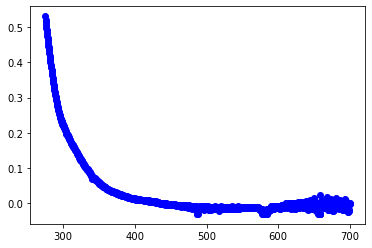

In [65]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize as optimize
from scipy.optimize import curve_fit
import numpy as np
#from lmfit import Model

# plot data
plt.plot(x, y, 'bo', label='data')

def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/max(b, 1.e-50)))


In [200]:
def hypRegress(x,y):

    xData = x
    yData = y

    xData = np.array(xData, dtype=float)
    yData = np.array(yData, dtype= float)

    def funcHyp(x, qi, exp, di):
        return qi*(1+exp*di*x)**(-1/exp)

    def errfuncHyp(p):
        return funcHyp(xData, p[0], p[1], p[2]) - yData

    print(xData.min(), xData.max())
    print(yData.min(), yData.max())

    trialX = np.linspace(xData[0], xData[-1], 1000)

    # Fit an hyperbolic
    popt, pcov = optimize.curve_fit(funcHyp, xData, yData)
    print (popt)
    yHYP = funcHyp(trialX, *popt)

    #optimization

    # initial values
    p1, success = optimize.leastsq(errfuncHyp, popt,maxfev=10000)
    print (p1)

    aaaa = funcHyp(trialX, *p1)

    plt.figure()
    plt.plot(xData, yData, 'r+', label='Data', marker='o')
    plt.plot(trialX, yHYP, 'r-',ls='--', label="Hyp Fit")
    plt.plot(trialX, aaaa, 'y', label = 'Optimized')
    plt.legend()
    plt.show(block=False)
    return p1


In [137]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
def decline_curve(curve_type, q_i):
    if curve_type == "exponential":
        def exponential_decline(T, a):
            return q_i*np.exp(-a*T)
        return exponential_decline
    
    elif curve_type == "hyperbolic":
        def hyperbolic_decline(T, a_i, b):
            return q_i/np.power((1+b*a_i*T), 1./b)
        return hyperbolic_decline
    
    elif curve_type == "harmonic":
        def parabolic_decline(T, a_i):
            return q_i/(1+a_i*T)
        return parabolic_decline
    
    else:
        raise "I don't know this decline curve!"

def L2_norm(Q, Q_obs):
    return np.sum(np.power(np.subtract(Q, Q_obs), 2))

In [182]:
exp_decline = decline_curve("exponential", Q[0])
hyp_decline = decline_curve("hyperbolic", Q[0])
har_decline = decline_curve("harmonic", Q[0])

popt_exp, pcov_exp = curve_fit(exp_decline, T, Q, method="trf")
popt_hyp, pcov_hyp = curve_fit(hyp_decline, T, Q, method="trf")
popt_har, pcov_har = curve_fit(har_decline, T, Q, method="trf")

print("L2 Norm of exponential decline: ", L2_norm(exp_decline(T, popt_exp[0]), Q))
print("L2 Norm of hyperbolic decline decline: ", L2_norm(hyp_decline(T, popt_hyp[0], popt_hyp[1]), Q))
print("L2 Norm of harmonic decline decline: ", L2_norm(har_decline(T, popt_har[0]), Q))

KeyError: 0

L2 Norm of exponential decline: 


In [201]:
#Use non-linear least squares to fit a function, f, to data

parameters, _ = optimize.curve_fit(test, x ,y)
[a,b] = parameters
print(a)
print(b)

0.0008489319216945608
1.0004895138612946


IndentationError: unexpected indent (<ipython-input-157-c4a5ac25bf65>, line 2)

IndexError: arrays used as indices must be of integer (or boolean) type

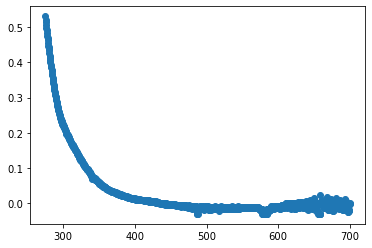

In [46]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = parameters[x_line, a, b]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [47]:
import numpy as np 
from scipy import optimize

def test(x, a, b):
    return (x*y) * a + (y) * b 

parameters, _ = optimize.curve_fit(test, x ,y)
[a,b] = parameters
print(a)
print(b) 

1.0729164598841145e-11
0.9999999968359308


In [48]:
 def test(x, y, s):
    return y * ((x)/(532)) ^ s

param, param_cov = curve_fit(test, x, y)

print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]

In [49]:
def test(x, a, b):
    return a * np.sin(b * x)

param, param_cov = curve_fit(test, x, y)

print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

Sine function coefficients:
[8.48931922e-04 1.00048951e+00]
Covariance of coefficients:
[[1.49860833e-05 7.80441234e-08]
 [7.80441234e-08 8.06898985e-05]]


In [50]:
def test(x, a, b):
    return a * np.sin(b * x)

param, param_cov = curve_fit(test, x, y)

print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

Sine function coefficients:
[8.48931922e-04 1.00048951e+00]
Covariance of coefficients:
[[1.49860833e-05 7.80441234e-08]
 [7.80441234e-08 8.06898985e-05]]


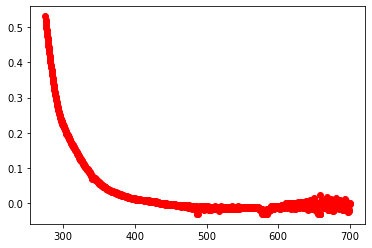

In [51]:
ans = (param[0]*(np.sin(param[1]*x)))
plt.plot(x, y, 'o', color ='red', label ="data")

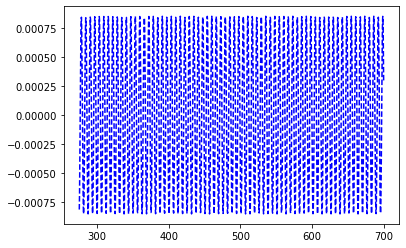

In [52]:
plt.plot(x, ans, '--', color ='blue', label ="optimized data")

In [55]:
## traslation of fminserch 

banana = lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2
xopt = scipy.optimize.fmin(func=banana, x0=[-275,700])

[1. 1. 1.]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


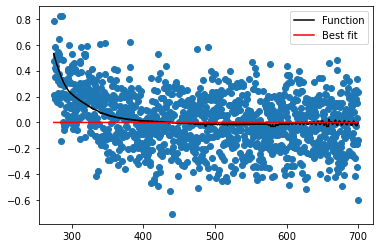

In [56]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl
  
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
  
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
  
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)
  
#popt returns the best fit values for parameters of the given model (func)
print (popt)
  
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x, ym, c='r', label='Best fit')
ax.legend()
fig.savefig('model_fit.png')

In [57]:
slopes =  { 's1': (275, 295),
        's2': (350,400),
        's3': (275, 700)
       }

In [59]:
# def monoExp(x, m, t, b):
#     return m * np.exp(-t * x) + b

def monoExp(slope, a_lr, dl, b):
    #dl = l - lr
    return a_lr * np.exp(-slope*dl) + b

# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")



NameError: name 'xs' is not defined

In [156]:
# save as a CSV 
# name it someththing that makes sence 
Absorption_spectra.to_csv('GOM21FA_BC_2_2153_Absorption_spectra.csv')